# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [66]:
import pandas as pd #Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.

In [76]:
airbnb2_df = pd.read_csv("airbnb_hw-2.csv") #Read in the CSV file

airbnb2_df.head() #Generate the first few rows
airbnb2_df.tail() #Generate the last few erows

airbnb2_df.shape #Generate shape

(30478, 13)

In [78]:
airbnb2_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [68]:
print("Missing values per column:") #Check for missing values
print(airbnb2_df.isna().sum())

airbnb2_df.dtypes #Check dtypes

airbnb2_df.dropna(inplace = True) #Drop rows with missing values

airbnb2_df.columns

Missing values per column:
Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

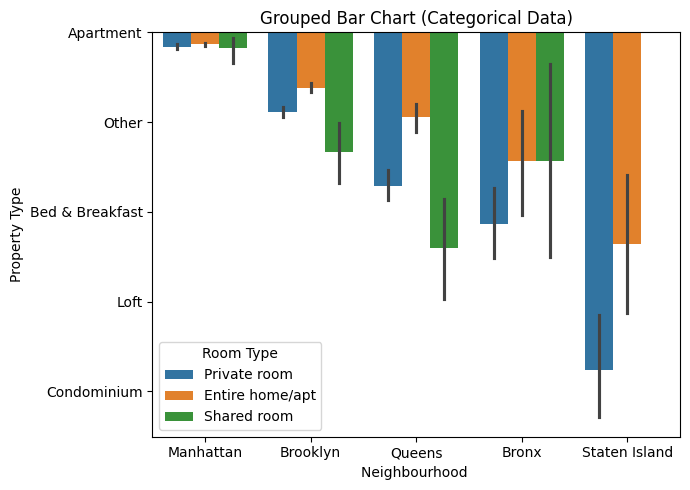

In [69]:
plt.figure(figsize=(7,5))
sns.barplot(data=airbnb2_df, x='Neighbourhood ', y='Property Type', hue='Room Type')
plt.title('Grouped Bar Chart (Categorical Data)')
plt.xlabel('Neighbourhood ')
plt.ylabel('Property Type')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

In [83]:
airbnb2_df['Price'] = airbnb2_df['Price'].str.replace(',', '').astype(float) #Cleaned the Price column (replaced commas, white spaces)

In [71]:
airbnb2_df.rename(columns={'Review Scores Rating (bin)': 'Review Scores Rating'}, inplace=True)

In [72]:
pd.crosstab(airbnb2_df['Price'], airbnb2_df['Property Type']) #Crosstab

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Townhouse,Treehouse,Villa
Price,,,,,,,,,,,,,,,,,,
10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


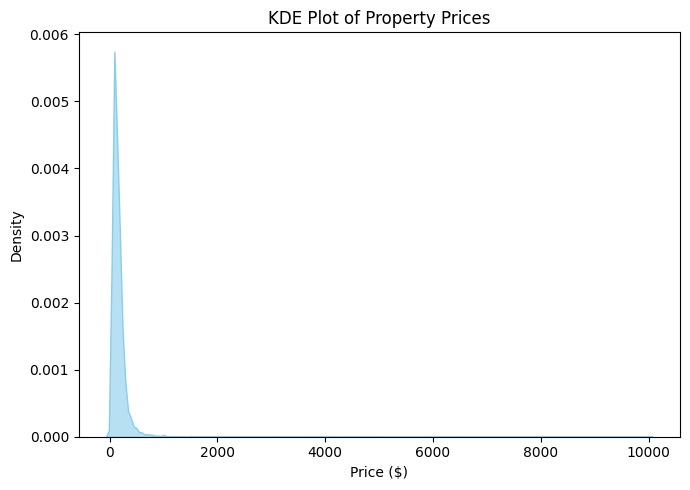

In [84]:
plt.figure(figsize=(7,5)) #Generate KDE plot
sns.kdeplot(data=airbnb2_df, x='Price', fill=True, color='skyblue', alpha=0.6)
plt.title('KDE Plot of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

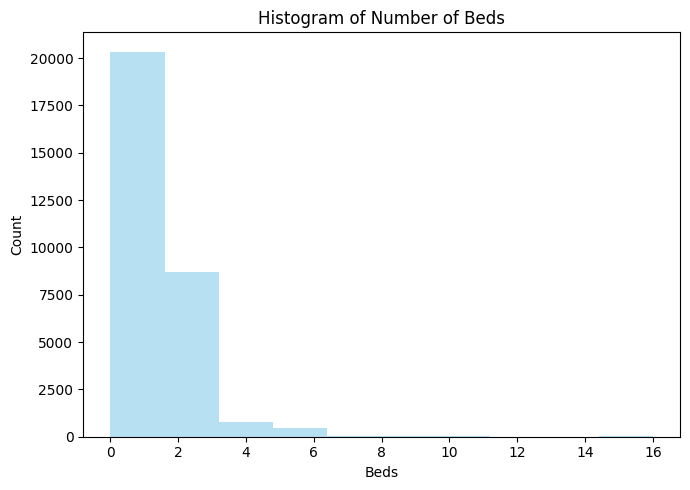

In [85]:
plt.figure(figsize=(7,5)) #Generate KDE plot
plt.hist(data=airbnb2_df, x='Beds', fill=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [86]:
pd.crosstab(airbnb2_df['Beds'], airbnb2_df['Room Type']) #Crosstab

Room Type,Entire home/apt,Private room,Shared room
Beds,,,
0.0,0,2,0
1.0,8564,11100,680
2.0,5324,1184,102
3.0,1850,196,25
4.0,709,50,24
5.0,272,8,4
6.0,161,7,9
7.0,41,4,0
8.0,23,1,0


In [87]:
pd.crosstab(airbnb2_df['Price'], airbnb2_df['Number of Records']) #Crosstab

Number of Records,1
Price,
10.0,3
20.0,3
21.0,1
22.0,1
24.0,3
...,...
5000.0,4
5999.0,1
6500.0,1


<Axes: xlabel='Beds', ylabel='Price'>

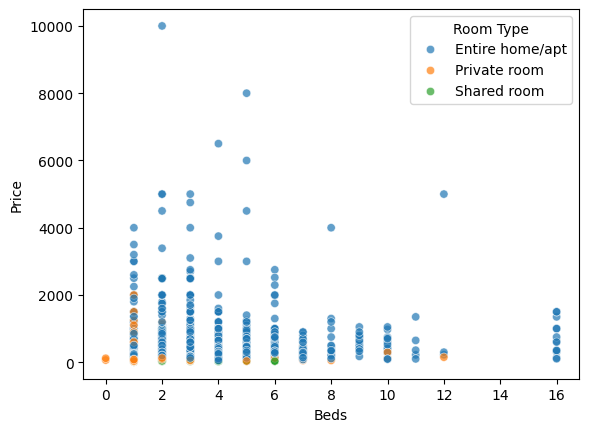

In [91]:
sns.scatterplot(data=airbnb2_df, x='Beds', y='Price', hue='Room Type', alpha=0.7)

2.